 ## <center>Practicing Machine Learning</center>
### <center>Classification Exercise </center>
### <center>Titanic - Machine Learning from Disaster </center>
#### <center> Recommended Source: <a href="https://www.amazon.com/-/es/Aur%C3%A9lien-G%C3%A9ron/dp/1492032646/ref=sr_1_fkmr1_1?__mk_es_US=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=2Y7BISU0SQYCV&keywords=hand+son+machine+learning+tensorflow+keras&qid=1664596219&qu=eyJxc2MiOiIwLjkzIiwicXNhIjoiMC4wMCIsInFzcCI6IjAuMDAifQ%3D%3D&sprefix=hand+son+machine+learning+tensorflow+keras%2Caps%2C105&sr=8-1-fkmr1">Link</a></center>
#### <center> Kaggle Competition Page: <a href="https://www.kaggle.com/competitions/titanic/data">Link</a></center>


In [243]:
# !kaggle competitions download -c titanic -p ~/datasets/titanic

## Loading the Titanic Data

Above is the link to downloading the data I will now proceed to create dataframes from data!

In [244]:
import os
data_path = os.path.join(os.path.join(os.getcwd(),'datasets'), 'titanic')
data_path

'C:\\Users\\Usuario1\\Desktop\\Work\\ML Learning\\Machine Learning Topics Explanation\\Traditional ML\\Classification\\Exercises\\datasets\\titanic'

In [245]:
os.listdir(data_path)

['gender_submission.csv', 'test.csv', 'train.csv']

In [246]:
import pandas as pd
train_set = pd.read_csv(os.path.join(data_path, 'train.csv'))
train_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [247]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [248]:
train_set.Pclass = train_set.Pclass.astype("category")
train_set.Sex = train_set.Sex.astype("category")
train_set.Cabin = train_set.Cabin.astype("category")

In [249]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    object  
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 71.7+ KB


In [250]:
train_set.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot: >

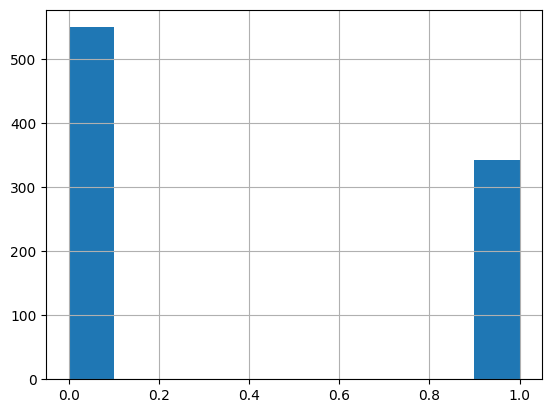

In [251]:
train_set.Survived.hist()

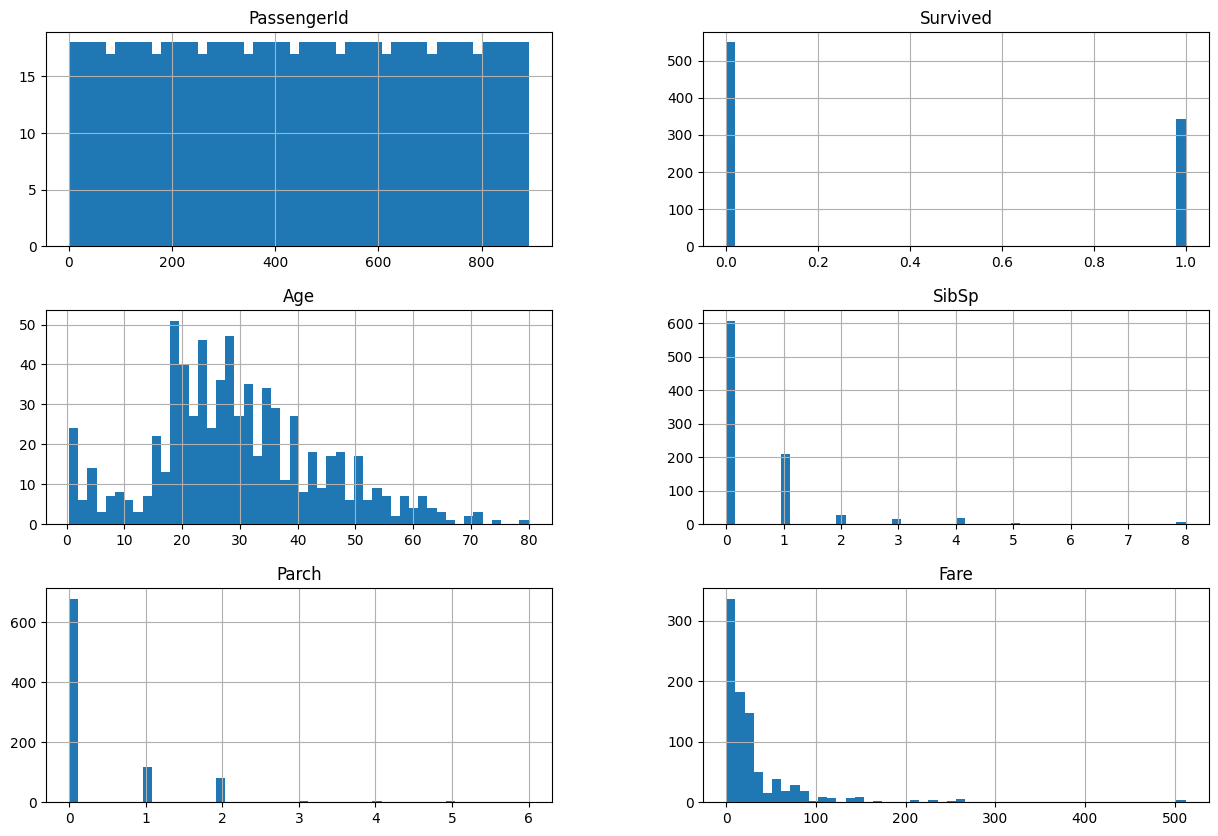

In [252]:
%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(15,10))
plt.show()

In [253]:
train_set.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Name: Survived, dtype: float64

In [254]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1989)
independent_variables = [variable for variable in train_set.columns.tolist() if variable not in ["Cabin", "Age", "Name", "Ticket", "PassengerId", "Survived", "Embarked"]]
print(independent_variables)
X = train_set.copy()[independent_variables]
y = train_set.Survived.copy()
X_resampled, y_resampled =  ros.fit_resample(X, y)

['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']


<AxesSubplot: >

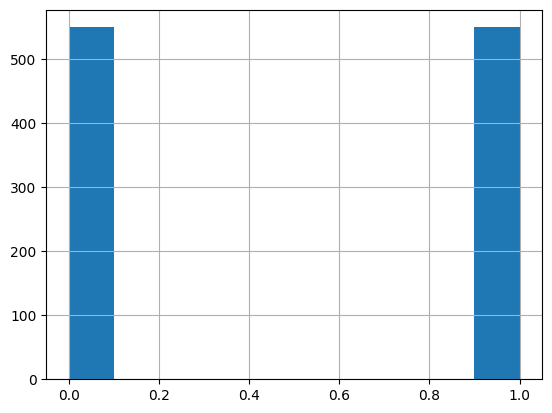

In [255]:
y_resampled.hist()

In [256]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

print(X_resampled)
num_attribs = [x for x in X_resampled.columns \
                if  X_resampled[x].dtype == np.float64 \
                        or X_resampled[x].dtype == np.int64]
cat_attribs = [x for x in X_resampled.columns \
                if not (X_resampled[x].dtype == np.float64 \
                        or X_resampled[x].dtype == np.int64)]
print(cat_attribs)
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('Scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('encode', OneHotEncoder())
])
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('encode', cat_pipeline, ['Sex'])
])

X_transformed = full_pipeline.fit_transform(X_resampled)
X_transformed

     Pclass     Sex  SibSp  Parch     Fare
0         3    male      1      0   7.2500
1         1  female      1      0  71.2833
2         3  female      0      0   7.9250
3         1  female      1      0  53.1000
4         3    male      0      0   8.0500
...     ...     ...    ...    ...      ...
1093      1    male      0      0  30.5000
1094      1  female      0      0  86.5000
1095      3  female      1      0  16.1000
1096      1  female      0      2  79.6500
1097      2  female      0      0  13.0000

[1098 rows x 5 columns]
['Pclass', 'Sex']


array([[ 0.46267113, -0.50062581, -0.55035447,  0.        ,  1.        ],
       [ 0.46267113, -0.50062581,  0.68343314,  1.        ,  0.        ],
       [-0.49947451, -0.50062581, -0.53734864,  1.        ,  0.        ],
       ...,
       [ 0.46267113, -0.50062581, -0.3798335 ,  1.        ,  0.        ],
       [-0.49947451,  1.96433893,  0.84464193,  1.        ,  0.        ],
       [-0.49947451, -0.50062581, -0.43956401,  1.        ,  0.        ]])

In [257]:
from sklearn.linear_model import LogisticRegression

logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_transformed, y_resampled)

LogisticRegression()

In [258]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
y_pred = cross_val_predict(logistic_reg_model, X_transformed, y_resampled, cv=8, method='predict')
log_reg_acc = logistic_reg_model.score(X_transformed, y_resampled)
log_reg_f1 = f1_score(y_resampled, y_pred)

In [259]:
from matplotlib import pyplot
importance = logistic_reg_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: -0.38800
Feature: 1, Score: -0.10547
Feature: 2, Score: 0.84741
Feature: 3, Score: 1.31542
Feature: 4, Score: -1.31546


In [260]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_transformed, y_resampled)

KNeighborsClassifier()

In [261]:
y_train_knn_pred = cross_val_predict(knn_clf, X_transformed, y_resampled, cv=8)
knn_acc = knn_clf.score(X_transformed, y_resampled)
knn_f1 = f1_score(y_resampled, y_train_knn_pred)

In [265]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=1989)
forest_model.fit(X_transformed, y_resampled)
y_forest = cross_val_predict(forest_model, X_transformed, y_resampled, cv=8, method='predict')
rf_acc = forest_model.score(X_transformed, y_resampled)
rf_f1 = f1_score(y_resampled, y_forest)

In [266]:


models = pd.DataFrame({
    'Model': [ 'Logistic Regression','KNN',
              'Random Forest'],
    'Accuracy Score': [log_reg_acc, knn_acc, rf_acc],
'F1 Score': [log_reg_f1, knn_f1, rf_f1]})
models.sort_values(by='F1 Score', ascending=False)


,Model,Accuracy Score,F1 Score
2,Random Forest,0.926230,0.841441
1,KNN,0.860656,0.818756
0,Logistic Regression,0.780510,0.761905
